<a href="https://colab.research.google.com/github/MarcusPauloFaustino1/Exercicios-Growdev/blob/main/Trabalho_Final_Programacao_Data_Science_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Parte 1


#### Importações

In [48]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

#### Resolução com cv2.filter2D

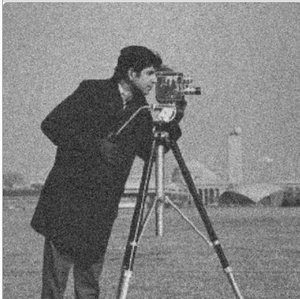

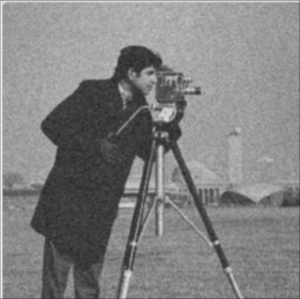

In [49]:


input_img = cv2.imread('imagem-com-ruido.png', 0)

img = input_img

cv2_imshow(input_img)

filtro = np.array([[1,2,1],[2,4,2],[1,2,1]])/16

output_img = cv2.filter2D(input_img, -1, filtro, borderType=cv2.BORDER_CONSTANT)

cv2_imshow(output_img)

#### Resolução Manual Numpy

Esta resolução está incompleta. Há um erro na lógica que não consegui identificar. O filtro foi aplicado, porém as  dimensões da imagem não ficaram exatas, ocorrendo um deformação na mesma. De qualquer forma, achei válido manter a resolução atual para posterior correção.



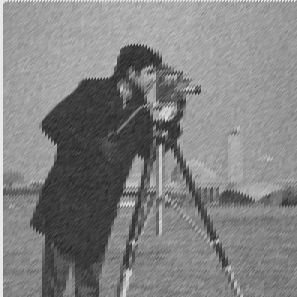

In [108]:
filtro = np.array([[1,2,1],[2,4,2],[1,2,1]])/16

shape = img.shape[1]

imm = np.array([[]])

s = 0
e = 3

ss = 0
ee = 3

while ee < shape:
  for x in img[ss:ee, s:e]:
    sum = np.sum(x * filtro)
    imm = np.append(imm,sum)
    s += 1
    e += 1

  if e == shape:
    ss += 1
    ee += 1
    s = 0
    e = 3

output_img = imm.reshape(297,297)

cv2_imshow(output_img)



#### Resolução Manual Numpy #2

Esta resolução foi obtida através da ajuda e do código escrito pelo Fernando Schneider, que muito solicitamente me ajudou. Destaco aqui meus agradecimentos ao estimado colega.

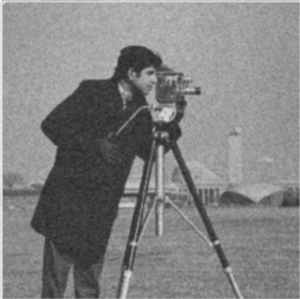

In [115]:
filtered = []
for y in range(3):
    a = np.copy(img)
    a = np.roll(a, y - 1, axis=0)
    for x in range(3):
        b= np.copy(a)
        b = np.roll(b, x - 1, axis=1)*filtro[y,x]
        filtered.append(b)

filtered = np.array(filtered)

filtered = np.sum(filtered, axis=0)

cv2_imshow(filtred)

### Parte 2

#### Ex.01

1) Qual o time que mais empatou em 2002 sendo visitante?

In [116]:
import pandas as pd

data = pd.read_csv('campeonato-brasileiro-full.csv')

data['Data'] = pd.DatetimeIndex(data['Data']).year
data.columns = data.columns.str.replace(' ', '_')

ano_2002 = data.query('Data == 2002 & Vencedor == "-"')

selection = ano_2002.groupby('Visitante')['Vencedor'].count().idxmax()

print(f'O time que mais empatou em 2002 sendo visitante foi: {selection}')

O time que mais empatou em 2002 sendo visitante foi: Internacional


#### Ex.02
2) Qual time que mais venceu jogando quarta-feira?

In [117]:
quarta_feira = data.query('Dia == "Quarta-feira" & Vencedor != "-"')

selection = quarta_feira.groupby('Visitante')['Vencedor'].count().idxmax()

print(f'O time que mais venceu jogando quarta-feira: {selection}')

O time que mais venceu jogando quarta-feira: Corinthians


#### Ex.03
3) Qual a quantidade de gols marcados por time em 2007 como mandante?

In [118]:
ano_2007 = data.query('Data == 2007')

selection = ano_2007.groupby('Mandante')['Mandante_Placar'].sum()

print(f'A quantidade de gols marcados por time em 2007 como mandante foi:\n{selection}')




A quantidade de gols marcados por time em 2007 como mandante foi:
Mandante
América-RN       12
Athlético-PR     29
Atlético-MG      40
Botafogo-RJ      38
Corinthians      17
Cruzeiro         44
Figueirense      35
Flamengo         37
Fluminense       30
Goiás            32
Grêmio           32
Internacional    27
Juventude        25
Náutico          35
Palmeiras        27
Paraná           24
Santos           36
Sport            40
São Paulo        35
Vasco            43
Name: Mandante_Placar, dtype: int64


#### Ex.04
4) Qual a rodada que mais teve gols em 2015?

In [120]:
ano_2015 = data.query('Data == 2015')

ano_2015['Soma_Gols'] = ano_2015['Mandante_Placar'] + ano_2015['Visitante_Placar']

selection = ano_2015.groupby('Rodada')['Soma_Gols'].sum().idxmax()


print(f'A rodada que mais teve gols em 2015 foi a rodada: {selection}\n\n\n')




A rodada que mais teve gols em 2015 foi a rodada: 31





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Ex.05
5) Qual foi a arena que mais sediou jogos de 2010 até 2016?

In [121]:
jogos_2010_2016 = data.query('2010 <= Data <= 2016')

selection = jogos_2010_2016.groupby('Arena')['Rodada'].count().idxmax()

print(f'A arena que mais sediou jogos de 2010 até 2016: {selection}')


A arena que mais sediou jogos de 2010 até 2016: Maracanã
